# SymPy and the van der Waals's Equation of State analytical solutions

This notebook intends to present van der Waals's Equation of State ([wikipedia](https://en.wikipedia.org/wiki/Van_der_Waals_equation), [nobel prize lecture](http://www.nobelprize.org/nobel_prizes/physics/laureates/1910/waals-lecture.pdf)), and to derive some fundamental thermodynamic properties from that, according to the rules of calculus of classical thermodynamics relations ([Tester and Model,1997](http://www.isbnsearch.org/isbn/9780139153563); [Michelsen and Mollerup, 2007](http://www.forskningsdatabasen.dk/en/catalog/108130984)).


> **Here you will meet the following topics:**
>- Thermodynamics: `fugacity coefficient`
>- Python: `sympy`

Sometimes, we need to perform analytical calculations because they can be implemented and run faster than brute force numerical solutions of problems. 
Here, we show how to use SymPy, the python package for symbolic mathematics, to find the expressions for second order derivative of van der Waals EoS with respect to molar volume and find analytical expressions for the three volume roots at given T and P.
SymPy is a computer algebra system (CAS) currently under development. It is capable of performing many stuff including:
* analytical calculus
  * differentiation
  * integration
  * solving differential and algebraic equations
* symbolic manipulation
  * simplification
  * expansion
  * substitution

In [1]:
import sympy as sympy

We define some python variables as *sympy.symbols*, to represent the conceptual variables in the functions with which we wish to work.

In [2]:
R=sympy.symbols("R")
#R <-- this R is the python variable to which the sympy.symbol object will be assigned
#              #"R" <-- this R is the symbol that appears when we print the equations that we will assemble with the python variable R
# we will use R to represent the universal gas constant
T=sympy.symbols("T")
# we will use T and to represent T for temperature
molar_V=sympy.symbols(r'\bar{V}')
# we will use molar_V to represent V with an over bar for molar volume
a,b=sympy.symbols("a,b")

In a notebook, we can use mathjax, to get "pretty printing" of sympy expressions. Just import `display` from `IPython.display` and run the `init_printing()` method of sympy telling it to use `mathjax` to render the equations.

In [3]:
from IPython.display import display
sympy.init_printing(use_latex='mathjax')

We can now test it

In [4]:
display(R,T,molar_V,a,b)

R

T

\bar{V}

a

b

And we define some functions of these variables with an explicit expression representation.
The following is the "explicit in Pressure" representation of the van der Waals equation of state.
The variable `P`, stands for the pressure that can be calculated explicitly as a function of variables `R`, `T`, `molar_V`, `b`, and `a`.

In [5]:
P=(R*T)/(molar_V-b) - a/(molar_V**2)

Call the display function to see that the variable `P` stands for the symbolic expression using the symbols $R$, $T$, $\bar{V}$, $a$, $b$

In [6]:
display(P)

    R⋅T          a    
─────────── - ────────
\bar{V} - b          2
              \bar{V} 

Note, however, that we did not create a symbol for pressure.
We will do it now, the symbol $P$ for pressure will be assigned to the variable `symbol_P`, to differentiate it from the already defined variable `P`. 

In [7]:
symbol_P = sympy.symbols("P")

Call the display function to see that the variable `symbol_P` stands for the symbol $P$.

In [8]:
display(symbol_P)

P

Now we would like to print both sides of the van der Waals equation. For that we use the relational function.

In [9]:
van_der_Waals_EoS = sympy.relational.Equality(symbol_P,P)
display(van_der_Waals_EoS)

        R⋅T          a    
P = ─────────── - ────────
    \bar{V} - b          2
                  \bar{V} 

Now we can retrieve the symbol $P$ from the left hand side of this equation, and the symbolic expression for $P(R,T,\bar{V},a,b)$ from the its right hand side.

In [10]:
display(van_der_Waals_EoS.lhs) #lhs stands for left hand side
display(van_der_Waals_EoS.rhs) #rhs stands for right hand side

P

    R⋅T          a    
─────────── - ────────
\bar{V} - b          2
              \bar{V} 

We can use the sympy method "derivative" to obtain the partial derivatives of $P$ with respect to its variables. We will create a varibale named `dPdT` to store the result of the derivative method.

In [11]:
dPdT = sympy.Derivative(van_der_Waals_EoS.rhs,T,evaluate=True)

Call the display function to see below the result of the derivative operation:

In [12]:
display(dPdT)

     R     
───────────
\bar{V} - b

We can also derrivate the van der Waals equation for molar volume (`dPdmolarV`) as follows:

In [13]:
dPdmolarV = sympy.Derivative(van_der_Waals_EoS.rhs,molar_V,evaluate=True)
display(dPdmolarV)

       R⋅T           2⋅a   
- ────────────── + ────────
               2          3
  (\bar{V} - b)    \bar{V} 

The second derivative with respect to molar volume (`d2PmolarV2`) can be obtained by applying the sympy derivative method to the variable `dPdmolarV`:

In [14]:
d2PdmolarV2 = sympy.Derivative(dPdmolarV,molar_V,evaluate=True)
display(d2PdmolarV2)

    2⋅R⋅T          6⋅a   
────────────── - ────────
             3          4
(\bar{V} - b)    \bar{V} 

After this effort, we would like to test our final equations for numerical results, for that purpose we can use the function `lambdify` from sympy. This will take any expression written using sympy and implement a numerical evaluation routine taking a dummy argument for each independent symbol present.

In [15]:
numerical_P = sympy.lambdify(    
    (
        R, T, molar_V, a, b
    ),
    van_der_Waals_EoS.rhs,
    "numpy")

Now, let's test it using some of the values from the previous lessons.

In [16]:
#define python variables and assign the desired values to them
value_R = 8.314
value_T = 273
value_molar_V = 1
value_a = 2.4954993637433445
value_b = 0.0001752320742732558

#evaluate the function using the values of choice
result_P = numerical_P(value_R,value_T,value_molar_V,value_a,value_b)

#print the result
print(result_P)

2267.6242984372743


Sympy has a `solve` function to obtain analytical solution of equations, when possible. For that purpose we must present the equation in an implicit representation: an expression containing no sign of equal and that any solution for the variables involved make the expression equal to zero. For a PVT equation of state, this would correspond to the left hand side of the general equation of state implict definition: $f(T,P,\bar{V})=0$. There are several ways of doing so, being the simplest one the subtractation of the right hand side of a defined equation from its left hand side and the assignment of this expression to a variable conveniently identified as Zero.

In [17]:
van_der_Waals_EoS_Zero=van_der_Waals_EoS.lhs-van_der_Waals_EoS.rhs

Call the function display and see that the variable van_der_Waals_EoS_Zero represents an expression that should be zero for a set of variables $R$, $T$, $\bar{V}$, $a$ and $b$ that solve the van_der_Waals_EoS_Zero

In [18]:
display(van_der_Waals_EoS_Zero)

        R⋅T          a    
P - ─────────── + ────────
    \bar{V} - b          2
                  \bar{V} 

Now call the function `solve` and obtain an explicit expression for one variable as a function of the remaining. As an example we will try to find the volume that is solution of the van der Waals EoS at given P and T, for a given substance (given a and b), given also the gas constant R

In [19]:
solution_molar_V_of_R_T_P_a_b = sympy.solve(van_der_Waals_EoS_Zero,molar_V)

If the cell above ran succesfully, it means that sympy found an analytical solution for the posed problem.
We can, then, use the function `len` to inquiry how many solutions were found.

In [20]:
print(len(solution_molar_V_of_R_T_P_a_b))

3


There were three solutions, because as we have seen in notebook 3, van der Waals EoS solution for molar volume corresponds to the solution of a third degree polynomial in $\bar{V}&, with coefficients depending on $R$, $P$, $T$, $a$ and $b$.
Let's inspect each of them. We use the function `print` to see its symbols in raw form, and the function `display` to see the expression formatted with mathjax by the 'pretty printing' package.
> note that the list of solutions "solution_molar_V_of_R_T_P_a_b" starts at index 0, as usual in python.

In [21]:
print(solution_molar_V_of_R_T_P_a_b[0])
display(solution_molar_V_of_R_T_P_a_b[0])

-(-3*a/P + (-P*b - R*T)**2/P**2)/(3*(sqrt(-4*(-3*a/P + (-P*b - R*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - R*T)/P**2 + 2*(-P*b - R*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - R*T)/(2*P**2) + (-P*b - R*T)**3/P**3)**(1/3)) - (sqrt(-4*(-3*a/P + (-P*b - R*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - R*T)/P**2 + 2*(-P*b - R*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - R*T)/(2*P**2) + (-P*b - R*T)**3/P**3)**(1/3)/3 - (-P*b - R*T)/(3*P)


                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                   3⋅a   (-P⋅b
                                                                 - ─── + ─────
                                                                    P         
                                                                              
- ────────────────────────────────────────────────────────────────────────────
               _____________________________________

In [22]:
print(solution_molar_V_of_R_T_P_a_b[1])
display(solution_molar_V_of_R_T_P_a_b[1])

-(-3*a/P + (-P*b - R*T)**2/P**2)/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*a/P + (-P*b - R*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - R*T)/P**2 + 2*(-P*b - R*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - R*T)/(2*P**2) + (-P*b - R*T)**3/P**3)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*a/P + (-P*b - R*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - R*T)/P**2 + 2*(-P*b - R*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - R*T)/(2*P**2) + (-P*b - R*T)**3/P**3)**(1/3)/3 - (-P*b - R*T)/(3*P)


                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                         3⋅a  
                                                                       - ─── +
                                                                          P   
                                                                              
- ────────────────────────────────────────────────────────────────────────────
                            ________________________

In [23]:
print(solution_molar_V_of_R_T_P_a_b[2])
display(solution_molar_V_of_R_T_P_a_b[2])

-(-3*a/P + (-P*b - R*T)**2/P**2)/(3*(-1/2 + sqrt(3)*I/2)*(sqrt(-4*(-3*a/P + (-P*b - R*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - R*T)/P**2 + 2*(-P*b - R*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - R*T)/(2*P**2) + (-P*b - R*T)**3/P**3)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(sqrt(-4*(-3*a/P + (-P*b - R*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - R*T)/P**2 + 2*(-P*b - R*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - R*T)/(2*P**2) + (-P*b - R*T)**3/P**3)**(1/3)/3 - (-P*b - R*T)/(3*P)


                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                         3⋅a  
                                                                       - ─── +
                                                                          P   
                                                                              
- ────────────────────────────────────────────────────────────────────────────
                            ________________________

Note that the second and third solutions present the symbol I (capital), that displays as *i*. This symbol represents the complex number ($i \mid i^2=-1$), sympy found two solutions for the molar volume that may be in the complex domain.

We can use the function `subs` to substitute constants, as is the case of $R$, when replacing $R$ with 8.3144598, we stipulate that $P$, $\bar{V}$, $a$ and $b$ should be supplied at SI base units, for which $\bar{V}$ will be returned in SI base units.

In [24]:
solution_molar_V_of_R_T_P_a_b_SI=[solution_molar_V_of_R_T_P_a_b[i].subs({R:8.3144598}) for i in range(0,3,1)]
#we use an implicit 'for' loop here (called list comprehension)
#to substitute R in each component of solution_molar_V_of_R_T_P_a_b independently.

In [25]:
print(solution_molar_V_of_R_T_P_a_b_SI[0])
display(solution_molar_V_of_R_T_P_a_b_SI[0])

-(-3*a/P + (-P*b - 8.3144598*T)**2/P**2)/(3*(sqrt(-4*(-3*a/P + (-P*b - 8.3144598*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - 8.3144598*T)/P**2 + 2*(-P*b - 8.3144598*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - 8.3144598*T)/(2*P**2) + (-P*b - 8.3144598*T)**3/P**3)**(1/3)) - (sqrt(-4*(-3*a/P + (-P*b - 8.3144598*T)**2/P**2)**3 + (-27*a*b/P - 9*a*(-P*b - 8.3144598*T)/P**2 + 2*(-P*b - 8.3144598*T)**3/P**3)**2)/2 - 27*a*b/(2*P) - 9*a*(-P*b - 8.3144598*T)/(2*P**2) + (-P*b - 8.3144598*T)**3/P**3)**(1/3)/3 - (-P*b - 8.3144598*T)/(3*P)


                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
- ────────────────────────────────────────────────────────────────────────────
               _____________________________________

To test the solution, we use lambdify as before:

In [26]:
numerical_V_1 = sympy.lambdify(    
    (
        T, symbol_P, a, b
    ),
    solution_molar_V_of_R_T_P_a_b_SI,
    "numpy")

And now we use, as input values, the same values that we used when we tested the implementation of $P(R,T,\bar{V},a,b)$.
However, note that since the expression deals with complex numbers, we must provide input and expect output consistent with the complex set. For that we have to import numpy and use its `complex` function to create variables representing real numbers with a data structure consistent to the complex numbers domain (finite value for the real part, and zero value for the complex part).

In [27]:
import numpy as np
c_value_T = np.complex(value_T,0)
c_value_P = np.complex(result_P,0)
c_value_a = np.complex(value_a,0)
c_value_b = np.complex(value_b,0)

result_V= numerical_V_1(c_value_T,c_value_P,c_value_a,c_value_b)

print(
    result_V[0]
)
print(
    result_V[1]
)
print(
    result_V[2]
)

(0.000218758034619+0j)
(0.0008814788249+0j)
(1.00005541643+2.71050543121e-20j)


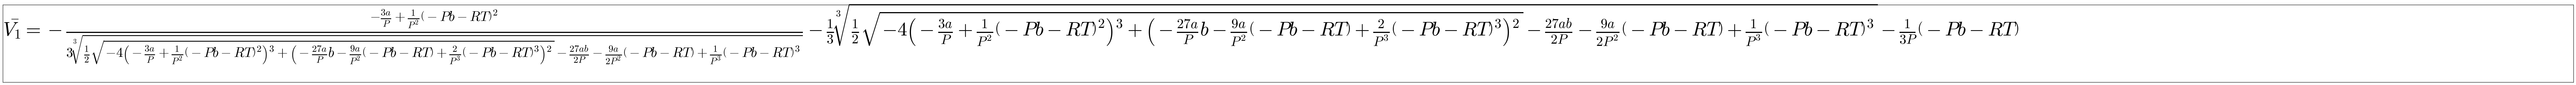

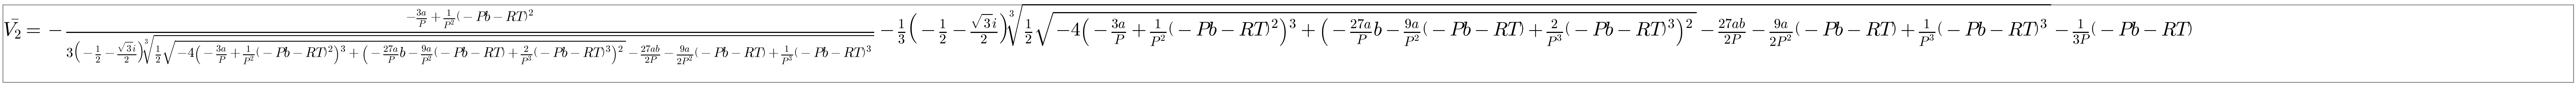

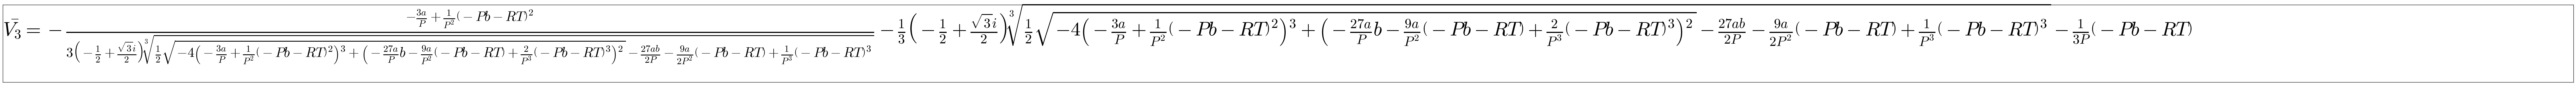

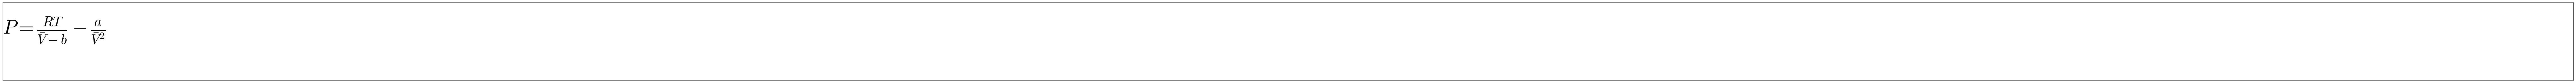

In [29]:
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc
%matplotlib inline

fig_width = 300 / 2.54 #in inches
fig_height = 9 / 2.54 #in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'ps',
#'axes.labelsize': 12,  #in pts
#'font.size': 8, #in pts
#'legend.fontsize': 8, #in pts
#'xtick.labelsize': 10, #in pts
#'ytick.labelsize': 10, #in pts
#'text.usetex': False,
'figure.figsize': fig_size}
rc.update(params)


V1=sympy.symbols(r'\bar{V_1}')
print1 = sympy.relational.Equality(V1,solution_molar_V_of_R_T_P_a_b[0])
V2=sympy.symbols(r'\bar{V_2}')
print2 = sympy.relational.Equality(V2,solution_molar_V_of_R_T_P_a_b[1])
V3=sympy.symbols(r'\bar{V_3}')
print3 = sympy.relational.Equality(V3,solution_molar_V_of_R_T_P_a_b[2])

lat = sympy.latex(print1)                                                            

#add text                                                                       
plt.text(0, 0.6, r"$%s$" % lat, fontsize = 50)                                  
#hide axes                                                                      
fig = plt.gca()                                                                 
fig.axes.get_xaxis().set_visible(False)                                         
fig.axes.get_yaxis().set_visible(False)                                         
plt.savefig('GA4-a.svg',format='svg')
plt.draw() #or savefig                                                          
plt.show()

lat = sympy.latex(print2)                                                            

#add text                                                                       
plt.text(0, 0.6, r"$%s$" % lat, fontsize = 50)                                  
#hide axes                                                                      
fig = plt.gca()                                                                 
fig.axes.get_xaxis().set_visible(False)                                         
fig.axes.get_yaxis().set_visible(False)                                         
plt.savefig('GA4-b.svg',format='svg')
plt.draw() #or savefig                                                          
plt.show()

lat = sympy.latex(print3)                                                            

#add text                                                                       
plt.text(0, 0.6, r"$%s$" % lat, fontsize = 50)                                  
#hide axes                                                                      
fig = plt.gca()                                                                 
fig.axes.get_xaxis().set_visible(False)                                         
fig.axes.get_yaxis().set_visible(False)                                         
plt.savefig('GA4-c.svg',format='svg')
plt.draw() #or savefig                                                          
plt.show()

lat = sympy.latex(van_der_Waals_EoS)                                                            

#add text                                                                       
plt.text(0, 0.6, r"$%s$" % lat, fontsize = 50)                                  
#hide axes                                                                      
fig = plt.gca()                                                                 
fig.axes.get_xaxis().set_visible(False)                                         
fig.axes.get_yaxis().set_visible(False)                                         
plt.savefig('GA4-d.svg',format='svg')
plt.draw() #or savefig                                                          
plt.show()

Note that the volume calculated in the third expression corresponds to the volume that we used as input when testing $P(R,T,\bar{V},a,b)$, which, being the largest of the three, is characteristic of a vapor aggregation state.
The other two values of volume correspond, in turn, to liquid state (the lower valued) and the intermediate valued volume root, both discussed in notebook 3.

# Conclusions
In this notebook, expressions for derivatives of pressure with respect to molar volume were found from the van der Waals equation of state. In addition, analytical expressions for all three molar volume roots for a given pair of temperature and pressure were derived using the SymPy package. After the introduction of SymPy, the student should be able to obtain analytical derivatives for any equation of state. The student should also be able to obtain properties like Gibbs energy, Helmholtz energy or Enthalpy from equations of state, since they can be obtained from the derivation and integration of PVT functions. 

# External references

### On python
* SymPy tutorial: [minireference / sympy tutorial](https://minireference.com/static/tutorials/sympy_tutorial.pdf)
* SymPy basics: [sympy / basic operators](http://docs.sympy.org/latest/tutorial/basic_operations.html)
* lambdify: [sympy / lambdify](http://docs.sympy.org/latest/modules/utilities/lambdify.html)
* "pretty printing" [sympy / printing](http://docs.sympy.org/dev/tutorial/printing.html)
* jupyter display [jupyter / examples / display](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%205%20-%20Rich%20Display%20System.ipynb)
* sympy tutorial in adv dif eq. [cfm / dobrush / am33](http://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html)

### On mathematcal methods
* exact solution of cubic equations: [wikipedia / cardano's method](https://en.wikipedia.org/wiki/Cubic_function#Cardano.27s_method)

# Credits
* Development of this chapter: Iuri Soter Viana Segtovich  
* Review: Fernando de Azevedo Medeiros
* Acknowledgments:
  * To Caleb Bell for first pointing out to me the capability of SymPy to solve a cubic EOS explicit in terms of pressure, for volume.